# Dataset
This dataset contains Data Science related job salaries from aijobs.net 
Source: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data

## Dictionary
- work_year: The year the salary was paid
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The name of the role
- salary: The total gross salary amount paid
- salary_currency: The currency of the salary paid as an ISO 4217 currency code
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code
- remote_ratio: The overall amount of work done remotely
- company_location: The country where the employer company is from
- company_size: The median number of people that worked for the company during the year


# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Get the Data

## Import the Data

In [8]:
import pandas as pd

# Replace with your path
salaries = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/ds_salaries.csv')

## Take a Quick Look at the Data Structure

In [9]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [10]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


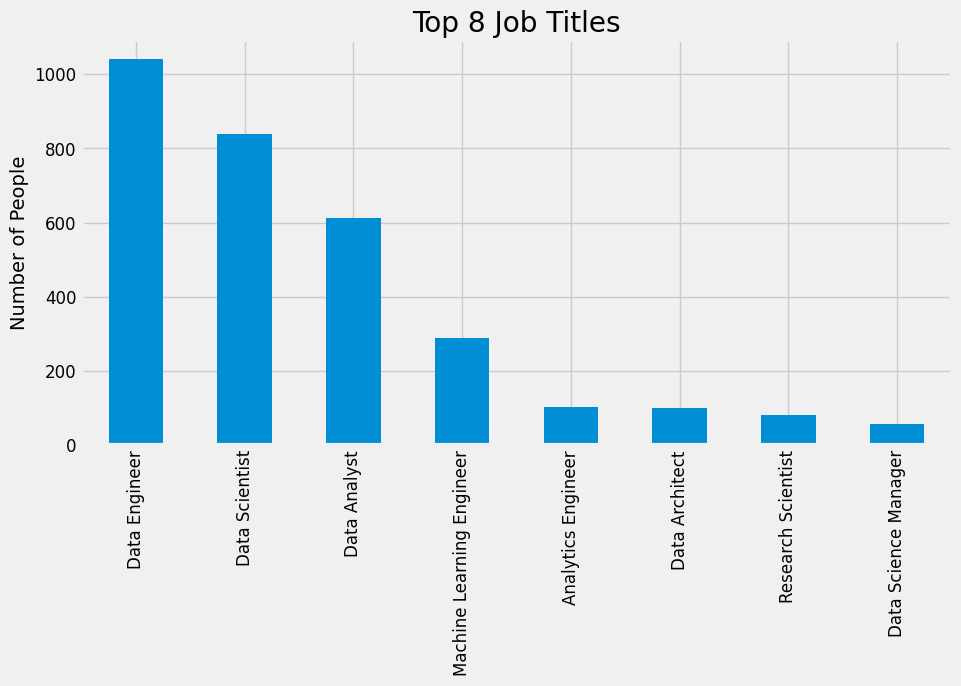

In [13]:
salaries["job_title"].value_counts()

salaries["job_title"].value_counts().nlargest(8).plot(kind='bar', figsize=(10,5))
plt.title("Top 8 Job Titles")
plt.ylabel('Number of People')
plt.show()


In [14]:
salaries["company_size"].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [15]:
salaries["experience_level"].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

Saving figure employee_residence_counts


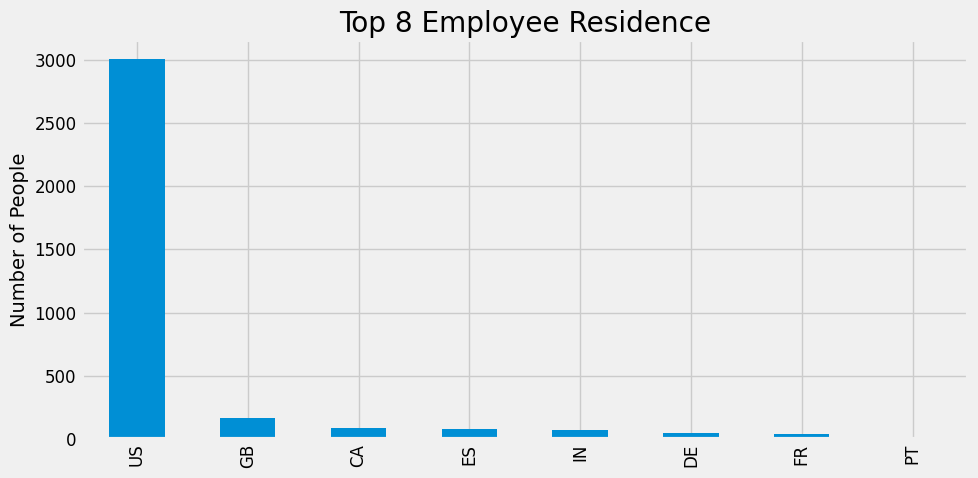

In [16]:
salaries["employee_residence"].value_counts()

#plot employee residence histogram
salaries["employee_residence"].value_counts().nlargest(8).plot(kind='bar', figsize=(10,5))
plt.title("Top 8 Employee Residence")
plt.ylabel('Number of People')
plt.show()

In [17]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Saving figure attribute_histogram_plots


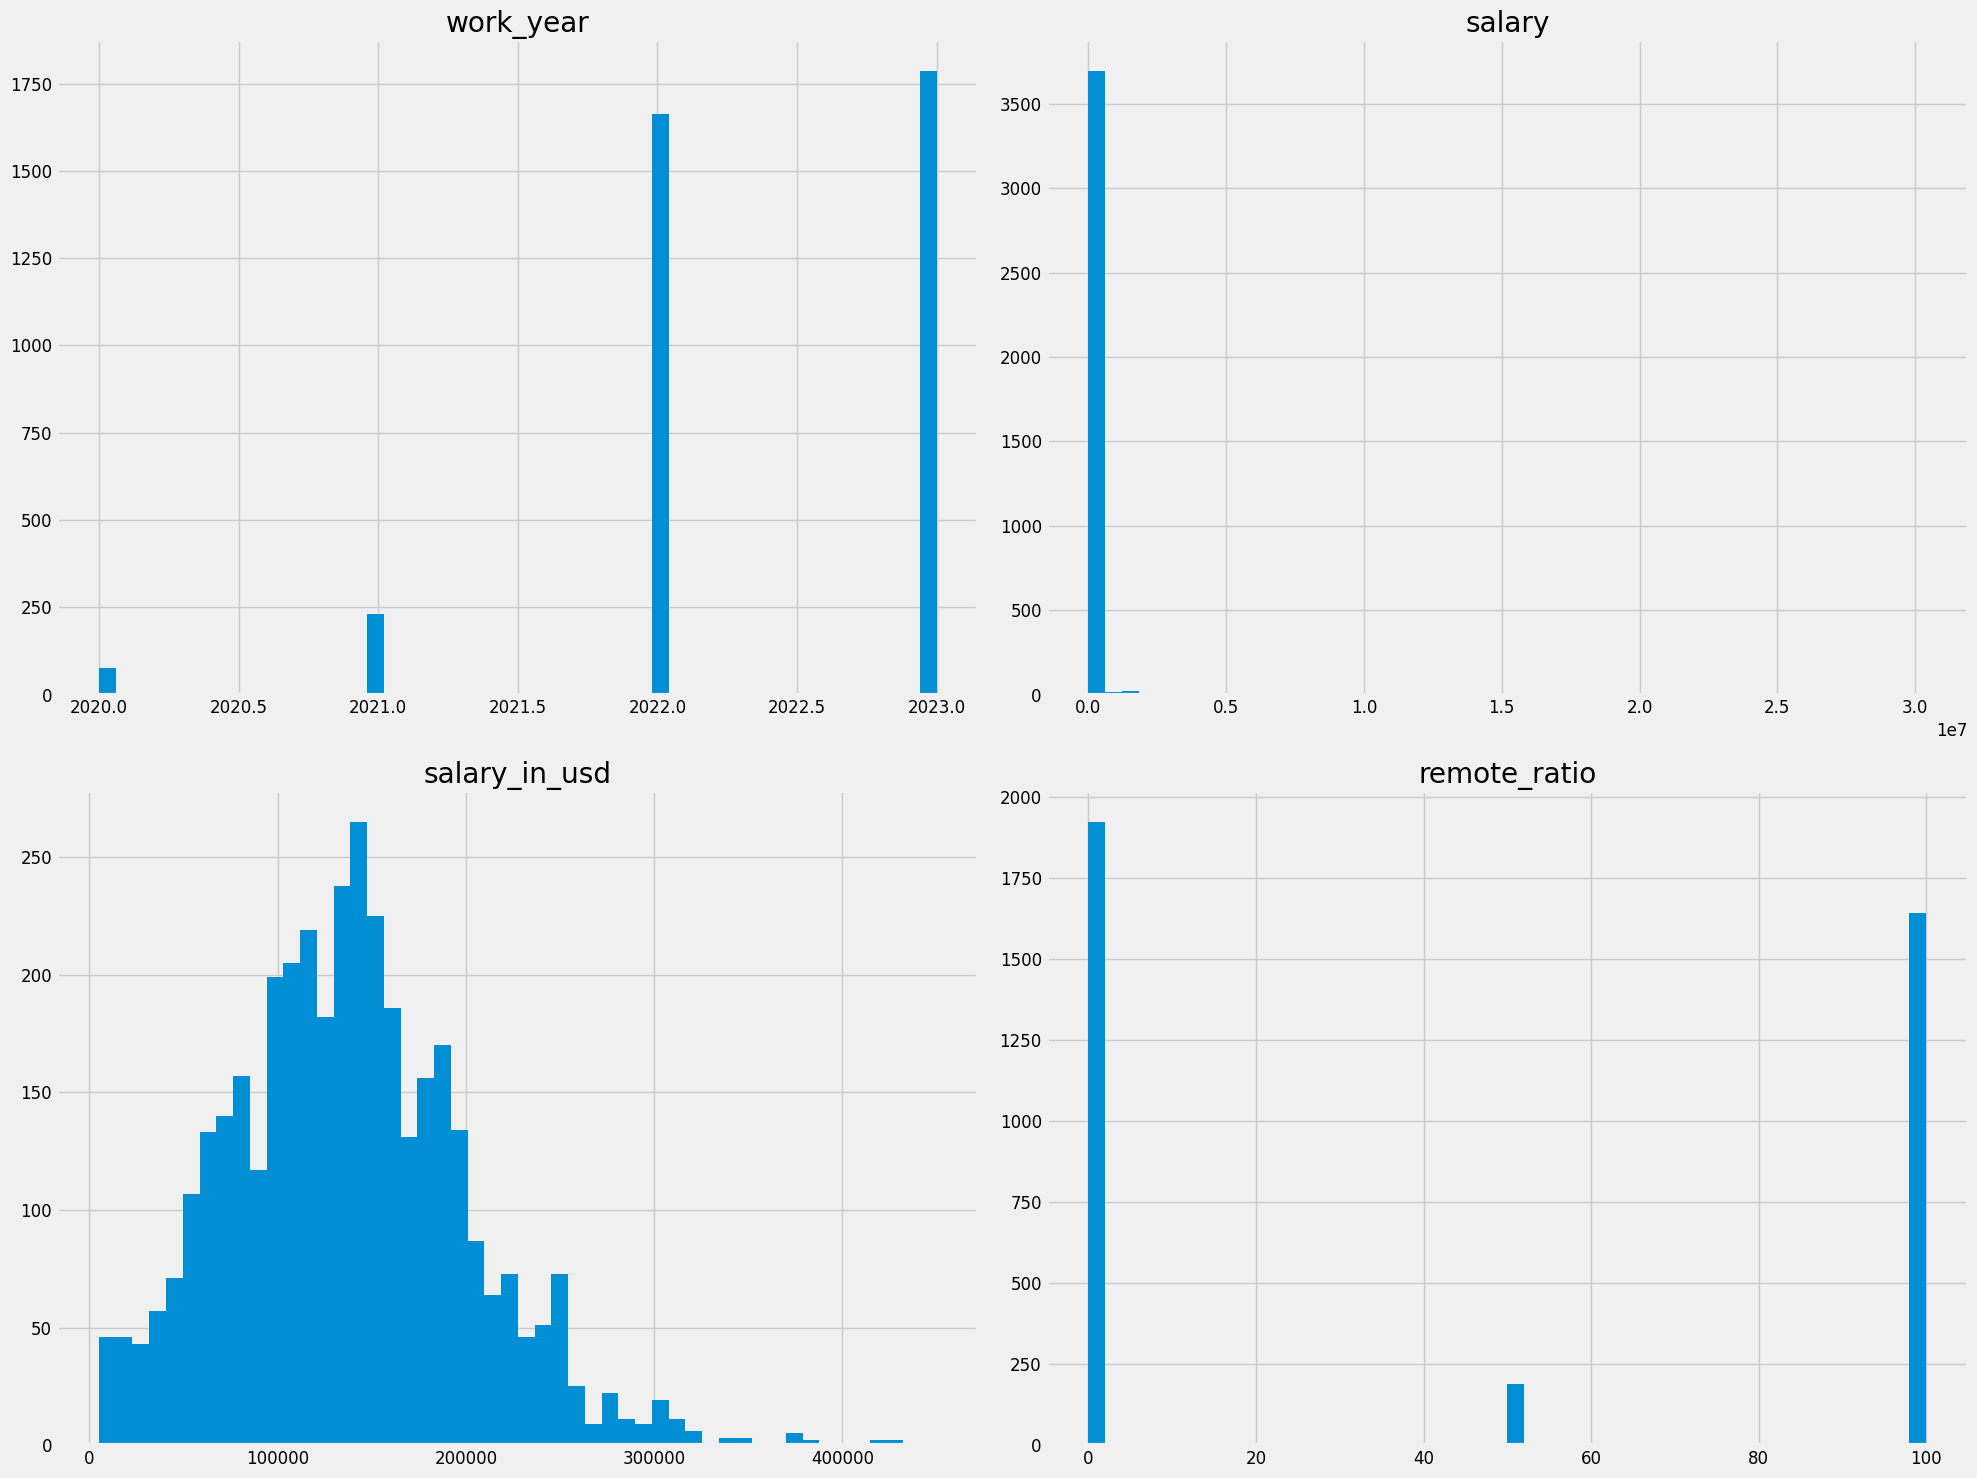

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
salaries.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.3 MB/s eta 0:00:00a 0:00:01


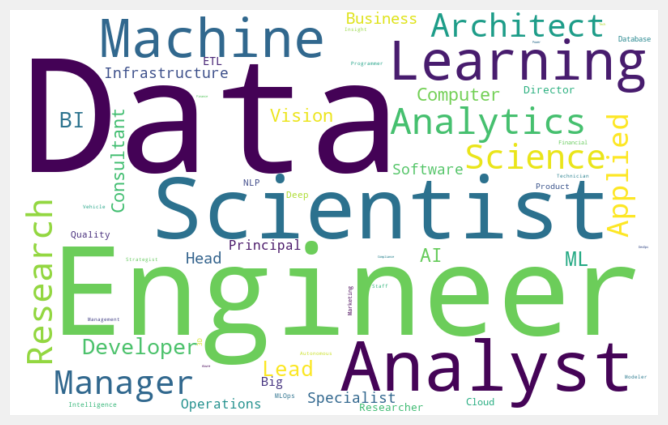

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'salaries' is your DataFrame and 'job_title' is a column containing job titles
# Concatenate all job titles into a single string
text = ' '.join(salaries['job_title'].astype(str))

# Define WordCloud parameters for customization
wordcloud_params = {
    'width': 800,
    'height': 500,
    'background_color': 'white',
    'collocations': False
}

# Generate the word cloud
wordcloud = WordCloud(**wordcloud_params).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Engineer, analyst, scientist, and Machine Learning are prominent terms. Columns will be created for jobs that include these terms. 

# Drop columns

In [21]:
salaries = salaries.drop(columns=['salary', 'salary_currency'], axis=1)

## Create a Test Set

In [22]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [23]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [24]:
train_set, test_set = split_train_test(salaries, 0.2)
len(train_set)

3004

In [25]:
len(test_set)

751

In [26]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [27]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [28]:
salaries = salaries.reset_index()   # adds an `index` column

salaries_with_index = salaries.copy()

salaries.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(salaries, test_size=0.2, random_state=42)



In [23]:
test_set.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2148,2148,2022,SE,FT,Machine Learning Software Engineer,168000,CA,100,CA,M
1044,1044,2023,SE,FT,Data Analyst,179975,US,100,US,M
3321,3321,2022,SE,FT,Data Scientist,144000,US,100,US,M
439,439,2023,SE,FT,Applied Scientist,222200,US,0,US,L
3519,3519,2021,EX,FT,Head of Data,230000,RU,50,RU,L


Saving figure salary_train_test_all_histograms


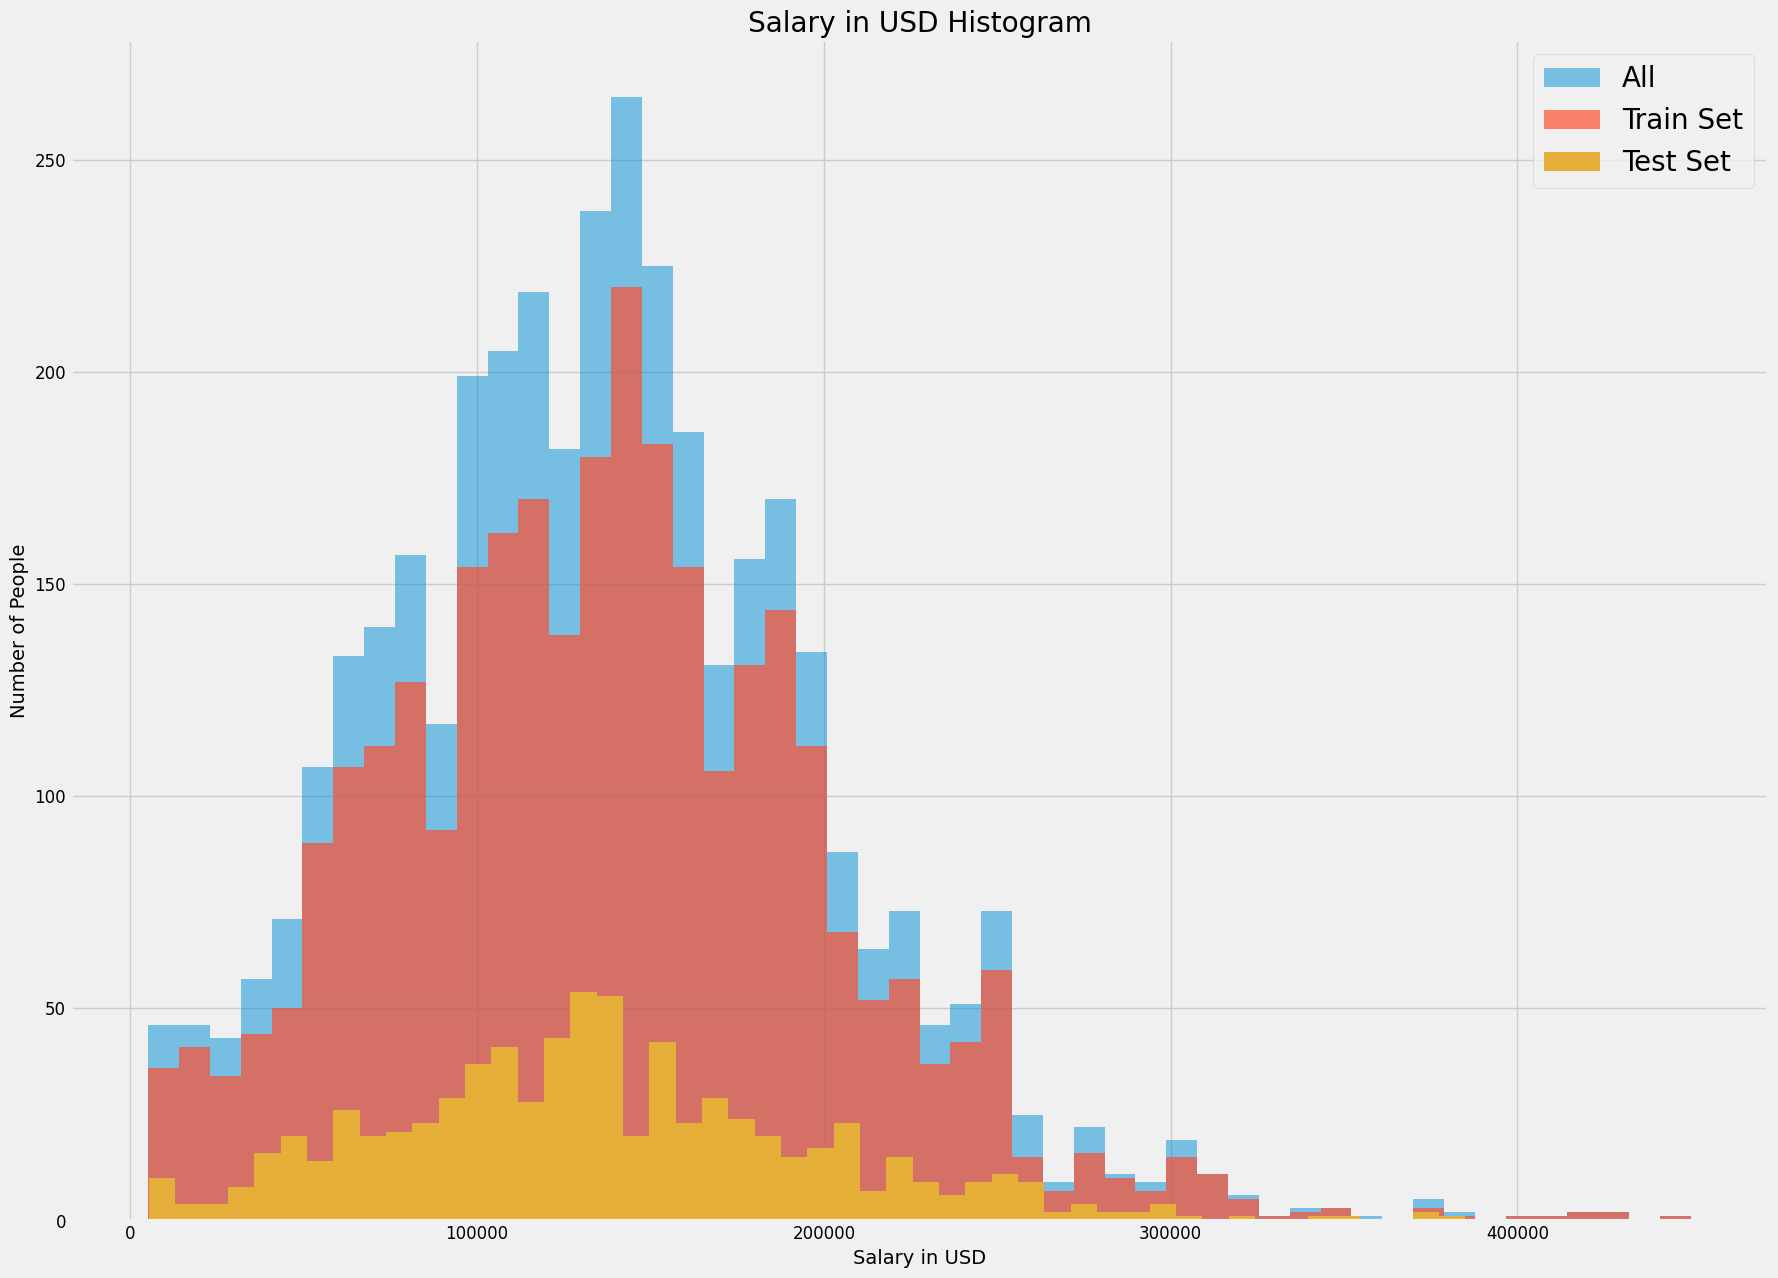

In [30]:
#plot all three histograms 
salaries["salary_in_usd"].hist(bins=50, figsize=(18,13), alpha = 0.5)

train_set["salary_in_usd"].hist(bins=50, figsize=(18,13), alpha = 0.7)

test_set["salary_in_usd"].hist(bins=50, figsize=(18,13), alpha = 1)

plt.xlabel("Salary in USD")
plt.ylabel("Number of People")
plt.title("Salary in USD Histogram")

plt.legend(["All", "Train Set", "Test Set"], fontsize = 20)
save_fig("salary_train_test_all_histograms")

plt.show()


In [31]:
# Drop index column to make it back to normal
salaries.drop("index", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [32]:
salaries_train_copy = train_set.copy()

## Looking for Correlations

In [33]:
corr_matrix = salaries_train_copy.corr()
corr_matrix.drop("index", axis=1, inplace=True) 


In [34]:
corr_matrix["salary_in_usd"].sort_values(ascending=False)


salary_in_usd    1.000000
work_year        0.230517
remote_ratio    -0.053722
index           -0.197517
Name: salary_in_usd, dtype: float64

Values are below |-0.8|, menaing that there is no multicollinearity.

array([[<Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <Axes: xlabel='work_year', ylabel='salary_in_usd'>,
        <Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>],
       [<Axes: xlabel='salary_in_usd', ylabel='work_year'>,
        <Axes: xlabel='work_year', ylabel='work_year'>,
        <Axes: xlabel='remote_ratio', ylabel='work_year'>],
       [<Axes: xlabel='salary_in_usd', ylabel='remote_ratio'>,
        <Axes: xlabel='work_year', ylabel='remote_ratio'>,
        <Axes: xlabel='remote_ratio', ylabel='remote_ratio'>]],
      dtype=object)

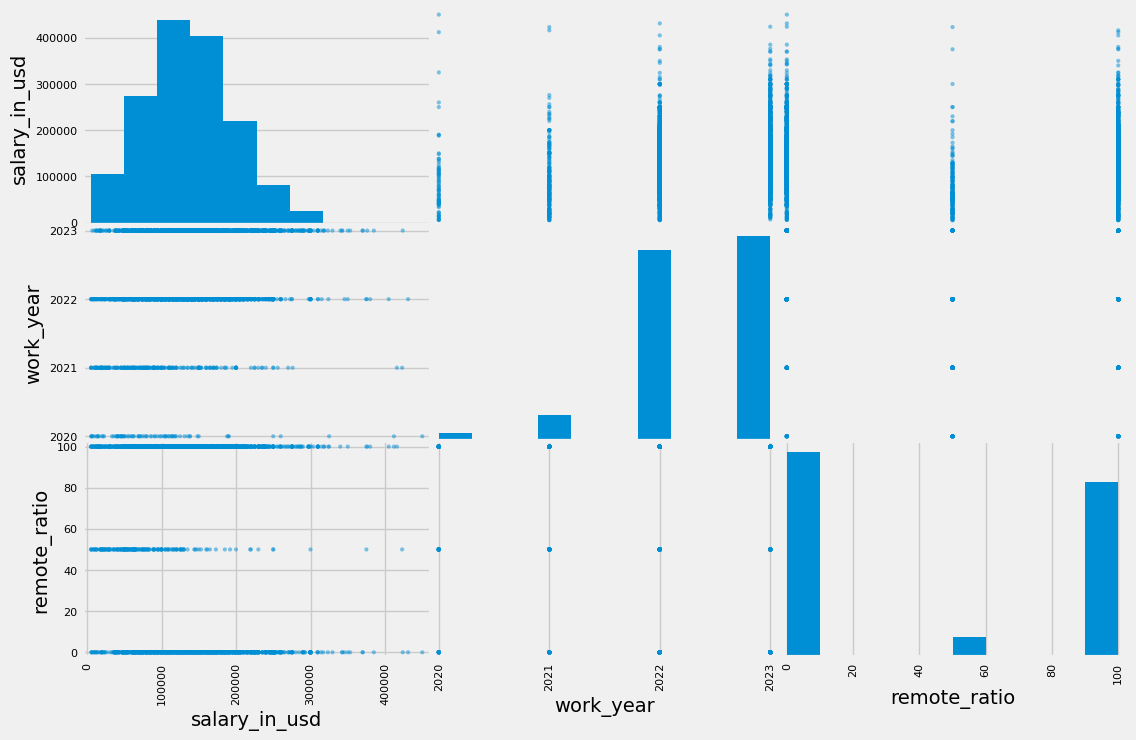

In [38]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["salary_in_usd", "work_year", "remote_ratio"]
scatter_matrix(salaries[attributes], figsize=(12, 8))

In [39]:
#view relationship with Exp level and salary

#group salary by experience level
salaries_exp = salaries.groupby('experience_level').mean()
salaries_exp


,work_year,salary_in_usd,remote_ratio
experience_level,,,
EN,2022.053125,78546.284375,55.156250
EX,2022.385965,194930.929825,48.245614
MI,2022.203727,104525.939130,46.211180
SE,2022.468203,153051.071542,45.071542


Saving figure salary_by_exp_level


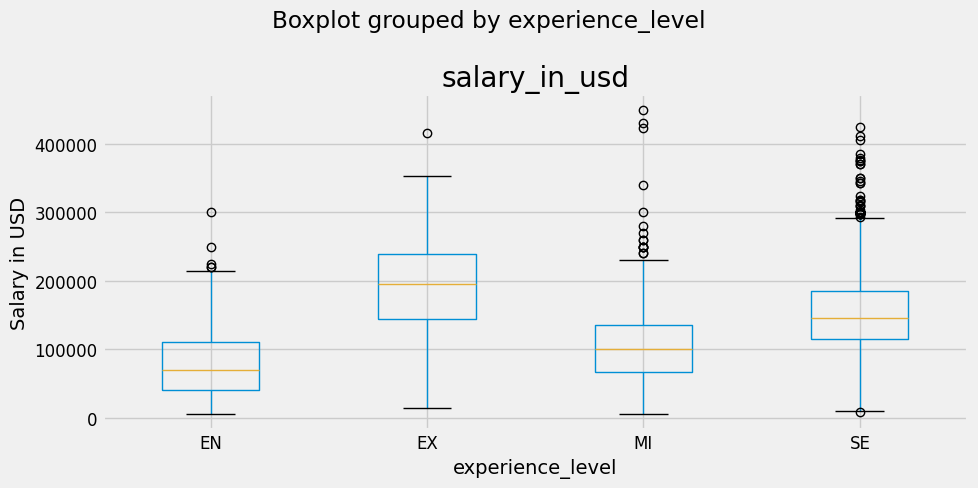

In [40]:
#box plot of salary by experience level
salaries.boxplot(column='salary_in_usd', by='experience_level', figsize=(10,5))
plt.ylabel('Salary in USD')
save_fig("salary_by_exp_level")
plt.show()


From the above box plot, it can be seen that the median salary is lowest for entry level (EN) workers followed by mid level (MI) workers, senior (SE) workers, and finally experienced (EX) workers.

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64
Saving figure salary_by_company_size


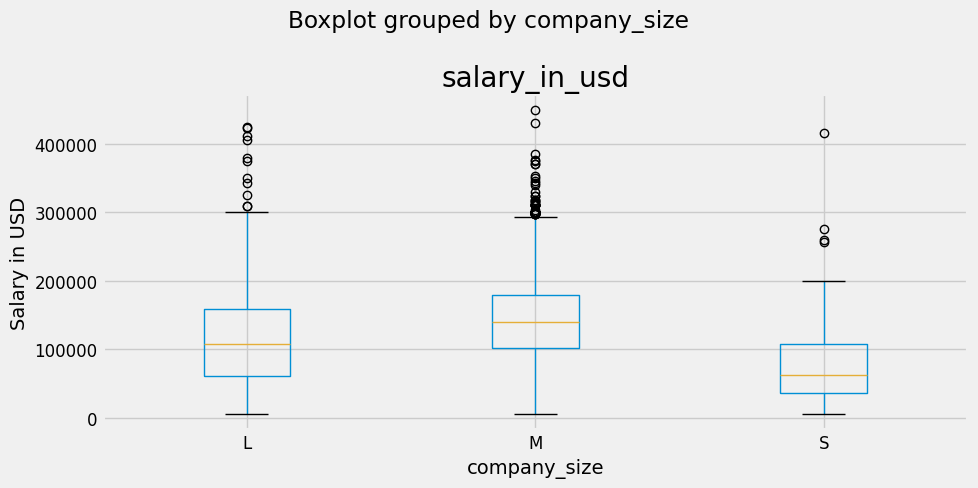

In [41]:
#view relationship with company size and salary

#group salary by company size
salaries_size = salaries.groupby('company_size').mean()
print(salaries_size['salary_in_usd'])

salaries.boxplot(column='salary_in_usd', by='company_size', figsize=(10,5))
plt.ylabel('Salary in USD')
save_fig("salary_by_company_size")
plt.show()




Medium sized companies pay the highest salary, while small comapnies pay the lowest. 

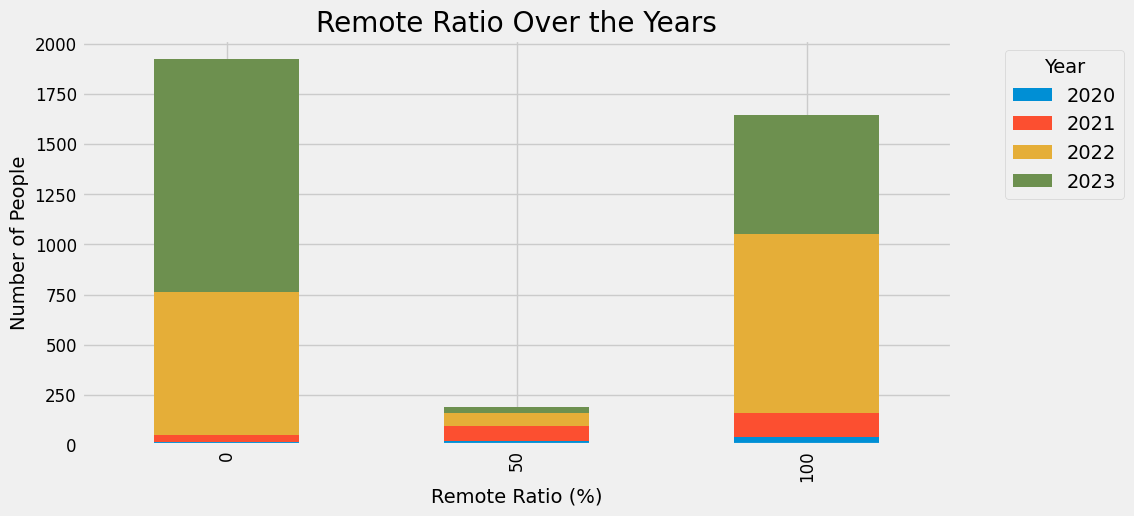

In [42]:
# Group by both 'remote_ratio' and 'year'
grouped_data = salaries.groupby(['remote_ratio', 'work_year']).size().unstack()

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title("Remote Ratio Over the Years")
plt.ylabel('Number of People')
plt.xlabel('Remote Ratio (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In 2020 and in 2021, the number of people working 100% remotely is higher compared to those who worked 0 and 50% remotely. In 2022, the number of people working remotely is higher, followed by those who did not work remotely and those working hybrid (50%). In 2023, people not working remotely are the highest, followed by those working 100% remotely and a very small portion working hybrid.

In [43]:
salaries['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

## Experimenting with Attribute Combinations and Custom Attributes

In [44]:
#create binary attribute to see if employee residence matches company location; 1 if yes, 0 if no
salaries['residence_location_match'] = np.where(salaries['employee_residence'] == salaries['company_location'], 1, 0)

#create variable to capture length of job title (number of words)
salaries['job_title_words'] = salaries['job_title'].str.split().str.len()  


In [45]:
corr_matrix = salaries.corr()
corr_matrix["salary_in_usd"].sort_values(ascending=False)

salary_in_usd               1.000000
work_year                   0.228290
residence_location_match    0.177811
job_title_words             0.010432
remote_ratio               -0.064171
Name: salary_in_usd, dtype: float64

In [46]:
salaries.describe()


,work_year,salary_in_usd,remote_ratio,residence_location_match,job_title_words
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638,0.974434,2.212250
std,0.691448,63055.625278,48.589050,0.157857,0.454609
min,2020.000000,5132.000000,0.000000,0.000000,2.000000
25%,2022.000000,95000.000000,0.000000,1.000000,2.000000
50%,2022.000000,135000.000000,0.000000,1.000000,2.000000
75%,2023.000000,175000.000000,100.000000,1.000000,2.000000
max,2023.000000,450000.000000,100.000000,1.000000,4.000000


In [47]:
# Use outputs from wordcloud to add new binary attributes
keywords = ['Engineer', 'Analyst', 'Scientist', 'Machine Learning']

#create columns for each keyword and set to 1 if 'job_title' contains keyword, 0 if not
for key in keywords:
    salaries[str(key)] = salaries['job_title'].str.contains(str(key)).astype(int)
    
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,residence_location_match,job_title_words,Engineer,Analyst,Scientist,Machine Learning
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,1,3,0,0,1,0
1,2023,MI,CT,ML Engineer,30000,US,100,US,S,1,2,1,0,0,0
2,2023,MI,CT,ML Engineer,25500,US,100,US,S,1,2,1,0,0,0
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M,1,2,0,0,1,0
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M,1,2,0,0,1,0


# Prepare the Data for Machine Learning Algorithms

In [48]:
X = salaries.drop(columns = ["salary_in_usd"], axis=1) # drop target
y = salaries["salary_in_usd"]



## Data Cleaning

In [49]:
#check for null 
print(salaries.isnull().sum())

work_year                   0
experience_level            0
employment_type             0
job_title                   0
salary_in_usd               0
employee_residence          0
remote_ratio                0
company_location            0
company_size                0
residence_location_match    0
job_title_words             0
Engineer                    0
Analyst                     0
Scientist                   0
Machine Learning            0
dtype: int64


In [50]:
# Create three entries with NaN values
practice_imputer = salaries_with_index.copy()
entry1 = [123456, 2020, 'MI', 'FT', 'Data Analyst', np.nan, 'US', 0, 'US','L']
entry2 = [123455, 2021, 'EN', 'FT', 'Data Engineer', np.nan, 'US', 0, 'US', 'L']
entry3 = [123454, 2022, 'MI', 'FT', 'Business Analyst', np.nan, 'US', 0, 'US', 'L']

entries = [entry1, entry2, entry3]

for entry in entries:
    practice_imputer = practice_imputer.append(pd.Series(entry, index=practice_imputer.columns), ignore_index=True)

#Check for null (After)
practice_imputer.isnull().sum()

index                 0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         3
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Three rows will null values in salary_in_usd were created, now they will be imputed using the median of all salary_in_usd. 

In [51]:
median = salaries["salary_in_usd"].median()
practice_imputer["salary_in_usd"].fillna(median, inplace=True)

indices_to_find = [123456, 123455, 123454]
practice_imputer_result = practice_imputer[practice_imputer['index'].isin(indices_to_find)]

practice_imputer_result

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3755,123456,2020,MI,FT,Data Analyst,135000.0,US,0,US,L
3756,123455,2021,EN,FT,Data Engineer,135000.0,US,0,US,L
3757,123454,2022,MI,FT,Business Analyst,135000.0,US,0,US,L


In [53]:
# Median imputer for pipeline use
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

salaries_num = salaries.select_dtypes(include=[np.number])

## Handling Text and Categorical Attributes

Categorical input feature in this dataset are stores in the list `cat_attr`:

In [122]:
cat1 = ["experience_level", "company_size"]
cat_attr_ordinal = X[cat1]
cat2 = ["employment_type", "job_title", "employee_residence", "company_location"]
cat_attr_hot = X[cat2]

In [123]:
from sklearn.preprocessing import OrdinalEncoder

# Give mapping dictionary
experience_order = ['EN', 'MI', 'SE', 'EX']
company_size_order = ['S', 'M', 'L']

# Create an instance of OrdinalEncoder with specified category orders
ordinal_encoder = OrdinalEncoder(categories=[experience_order, company_size_order])

salaries_cat_encoded = ordinal_encoder.fit_transform(cat_attr_ordinal)
salaries_cat_encoded[:10]

array([[2., 2.],
       [1., 0.],
       [1., 0.],
       [2., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.],
       [2., 1.],
       [2., 1.],
       [2., 1.]])

In [124]:
ordinal_encoder.categories_

[array(['EN', 'MI', 'SE', 'EX'], dtype=object),
 array(['S', 'M', 'L'], dtype=object)]

In [125]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
salaries_cat_1hot = cat_encoder.fit_transform(cat_attr_hot)
salaries_cat_1hot

<3755x247 sparse matrix of type '<class 'numpy.float64'>'
	with 15020 stored elements in Compressed Sparse Row format>

In [126]:
cat_encoder.categories_

[array(['CT', 'FL', 'FT', 'PT'], dtype=object),
 array(['3D Computer Vision Researcher', 'AI Developer', 'AI Programmer',
        'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist',
        'Applied Machine Learning Engineer',
        'Applied Machine Learning Scientist', 'Applied Scientist',
        'Autonomous Vehicle Technician', 'Azure Data Engineer',
        'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
        'BI Developer', 'Big Data Architect', 'Big Data Engineer',
        'Business Data Analyst', 'Business Intelligence Engineer',
        'Cloud Data Architect', 'Cloud Data Engineer',
        'Cloud Database Engineer', 'Compliance Data Analyst',
        'Computer Vision Engineer', 'Computer Vision Software Engineer',
        'Data Analyst', 'Data Analytics Consultant',
        'Data Analytics Engineer', 'Data Analytics Lead',
        'Data Analytics Manager', 'Data Analytics Specialist',
        'Data Architect', 'Data DevOps Engineer', 'Data Engineer',
    

# Custom Transformer

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        residence_location_match = np.apply_along_axis(self._residence_location_match, axis=1, arr=X)
        return np.column_stack([X, residence_location_match])
    
    def _residence_location_match(self, column):
        return 1 if column[0] == column[1] else 0
    
    def fit_transform(self, X, y=None, **fit_params):
        # Add the 'residence_location_match' column during fit_transform
        residence_location_match = np.apply_along_axis(self._residence_location_match, axis=1, arr=X)
        return np.column_stack([X, residence_location_match])

attr_adder = CombinedAttributesAdder()
salaries_extra_attribs = attr_adder.fit_transform(X)


## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])


salaries_num_tr = num_pipeline.fit_transform(salaries_num)



In [129]:
salaries_num_tr

array([[ 0.90599446, -0.82039118,  1.10591825, ...,  1.58928336,
        -0.33308669,  0.        ],
       [ 0.90599446, -1.70618745,  1.10591825, ..., -0.62921442,
        -0.33308669,  0.        ],
       [ 0.90599446, -1.77756251,  1.10591825, ..., -0.62921442,
        -0.33308669,  0.        ],
       ...,
       [-3.43330297, -0.51660304,  1.10591825, ...,  1.58928336,
        -0.33308669,  0.        ],
       [-3.43330297, -0.59590867,  1.10591825, ..., -0.62921442,
        -0.33308669,  0.        ],
       [-1.9868705 , -0.68052777,  0.07674278, ..., -0.62921442,
        -0.33308669,  0.        ]])

In [130]:
from sklearn.compose import ColumnTransformer

num_attribs = ['work_year', 'remote_ratio']

cat_attr_ordinal = ["experience_level", "company_size"]
cat_attr_hot = ["employment_type", "job_title", "employee_residence", "company_location"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat_ordinal", OrdinalEncoder(), cat_attr_ordinal),
        ("cat_hot", OneHotEncoder(), cat_attr_hot),
    ])


salaries_prepared = full_pipeline.fit_transform(salaries)




In [131]:
# Turn sparse matrix into dataframe
import scipy.sparse

salaries_prepared_df = pd.DataFrame.sparse.from_spmatrix(salaries_prepared)

In [132]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(salaries_prepared_df, y, test_size=0.2, random_state=42)


# Select and Train a Model

## Training and Evaluating on the Training Set

### Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [134]:
# let's try the full preprocessing pipeline on a few training instances
some_data = salaries.iloc[:10]
some_labels = y_train.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [173372.1777694  162581.12213619 162581.12213619 141792.78027515
 141792.78027515 198432.52479056 198432.52479056 139825.37180863
 139825.37180863 163237.51697694]


Compare against the actual values:

In [135]:
print("Actual:", list(some_labels))

Actual: [36773, 151800, 100000, 156600, 175000, 220000, 104650, 51716, 90000, 140000]


In [136]:
some_data_prepared

<10x252 sparse matrix of type '<class 'numpy.float64'>'
	with 77 stored elements in Compressed Sparse Row format>

In [137]:
from sklearn.metrics import mean_squared_error

salaries_predictions = lin_reg.predict(X_test[:5])
lin_mse = mean_squared_error(y_test[:5], salaries_predictions)
lin_rmse = np.sqrt(lin_mse)
print("MSE Linear Regression =", lin_rmse)

MSE Linear Regression = 61396.755026128216


In [138]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test[:5], salaries_predictions)
print("MAE Linear Regression =", lin_mae)

MAE Linear Regression = 49805.265873010954


In [139]:
# Lienar Regression on all data

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

some_data = salaries.iloc[:]
some_labels = y_train.iloc[:]
some_data_prepared = full_pipeline.transform(some_data)

salaries_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, salaries_predictions)
lin_rmse = np.sqrt(lin_mse)
print("MSE Linear Regression =", lin_rmse)

lin_mae = mean_absolute_error(y_test, salaries_predictions)
print("MAE Linear Regression =", lin_mae)


MSE Linear Regression = 50501.60077705347
MAE Linear Regression = 38085.730824383485


### Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE Decision Tree Regressor:", tree_rmse)

RMSE Decision Tree Regressor: 51138.177979268345


In [141]:
from sklearn.tree import DecisionTreeClassifier

# Build the model
decisiontree = DecisionTreeClassifier(max_depth=10)
model = decisiontree.fit(X_train, y_train)

# Using the model to predict the results based on the test dataset
y_test_pred = model.predict(X_test)

# Calculate the mean squared error of the prediction
from sklearn.metrics import accuracy_score
print("Accuracy score Decision Tree Classifier:", accuracy_score(y_test, y_test_pred))

Accuracy score Decision Tree Classifier: 0.05193075898801598


## Better Evaluation Using Cross-Validation

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [55281.24102223 53317.53155809 57676.7652301  59180.3205962
 65101.93569208 44808.62718802 59456.48961351 53051.81119478
 55750.19741305 55251.33676933]
Mean: 55887.62562773939
Standard deviation: 4998.660286022267


In [77]:
lin_scores = cross_val_score(lin_reg, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [52444.6203196  48483.07650968 51696.17732349 55570.91895182
 60142.01783914 41420.10350787 56776.09924712 48899.87231346
 51527.31515813 50289.72023218]
Mean: 51724.99214024962
Standard deviation: 4883.144304927413


In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
salaries_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, salaries_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE Random Forest Regressor =", forest_rmse)

RMSE Random Forest Regressor = 48683.87001356466


In [80]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53970.24296038 52525.51605715 53691.59846608 57286.16785803
 59834.4868422  41930.80282076 54628.26513962 49007.86941999
 48841.06429275 51087.35919805]
Mean: 52280.337305501016
Standard deviation: 4728.821601597015


In [81]:
scores = cross_val_score(lin_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     51724.992140
std       5147.286049
min      41420.103508
25%      49247.334293
50%      51611.746241
75%      54789.344294
max      60142.017839
dtype: float64

# Fine-Tune Forest Model


## Grid Search

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [83]:
best_params = grid_search.best_params_

best_estimators = best_params['n_estimators']
best_features = best_params['max_features']



In [84]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51138.62484880416 {'max_features': 2, 'n_estimators': 3}
49594.29515725236 {'max_features': 2, 'n_estimators': 10}
49143.92394790461 {'max_features': 2, 'n_estimators': 30}
51156.68890769288 {'max_features': 4, 'n_estimators': 3}
49788.81149960915 {'max_features': 4, 'n_estimators': 10}
49021.87358657677 {'max_features': 4, 'n_estimators': 30}
50186.01395480075 {'max_features': 6, 'n_estimators': 3}
49133.11800189153 {'max_features': 6, 'n_estimators': 10}
48849.092867672676 {'max_features': 6, 'n_estimators': 30}
50152.88928683686 {'max_features': 8, 'n_estimators': 3}
49575.19085496951 {'max_features': 8, 'n_estimators': 10}
49017.05841806345 {'max_features': 8, 'n_estimators': 30}
50926.053694081726 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
50270.28051209916 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
50945.4875450161 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50105.453084080706 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [86]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044966,0.003436,0.005925,0.000479,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-2.666160e+09,-2.517882e+09,...,-2.615159e+09,2.097294e+08,16,-1.745034e+09,-1.734214e+09,-1.719519e+09,-1.744185e+09,-1.794009e+09,-1.747392e+09,2.505821e+07
1,0.074705,0.003620,0.029840,0.046250,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.634743e+09,-2.422457e+09,...,-2.459594e+09,2.500194e+08,7,-1.592831e+09,-1.641549e+09,-1.623270e+09,-1.675583e+09,-1.700717e+09,-1.646790e+09,3.802468e+07
2,0.163107,0.012645,0.008514,0.000641,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.595536e+09,-2.405238e+09,...,-2.415125e+09,2.336547e+08,5,-1.569549e+09,-1.618218e+09,-1.600426e+09,-1.638990e+09,-1.660982e+09,-1.617633e+09,3.144438e+07
3,0.042534,0.001468,0.005599,0.000250,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-2.855763e+09,-2.588443e+09,...,-2.617007e+09,2.325173e+08,17,-1.711081e+09,-1.737052e+09,-1.732170e+09,-1.771258e+09,-1.800608e+09,-1.750434e+09,3.166194e+07
4,0.094187,0.042014,0.006373,0.000506,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.682667e+09,-2.443043e+09,...,-2.478926e+09,2.500128e+08,8,-1.596921e+09,-1.637761e+09,-1.629863e+09,-1.673608e+09,-1.700170e+09,-1.647665e+09,3.583240e+07
5,0.157048,0.008934,0.008368,0.000630,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.656357e+09,-2.357546e+09,...,-2.403144e+09,2.398540e+08,3,-1.565684e+09,-1.614196e+09,-1.602925e+09,-1.635171e+09,-1.667619e+09,-1.617119e+09,3.385750e+07
6,0.067439,0.045158,0.005958,0.000224,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.658881e+09,-2.560355e+09,...,-2.518636e+09,2.098602e+08,11,-1.712297e+09,-1.711966e+09,-1.699803e+09,-1.748324e+09,-1.777340e+09,-1.729946e+09,2.873070e+07
7,0.075420,0.002903,0.006832,0.000460,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.585460e+09,-2.374319e+09,...,-2.414063e+09,2.547153e+08,4,-1.590195e+09,-1.637280e+09,-1.624734e+09,-1.662923e+09,-1.695625e+09,-1.642151e+09,3.554536e+07
8,0.157866,0.006018,0.007870,0.000392,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.613196e+09,-2.372388e+09,...,-2.386234e+09,2.379977e+08,1,-1.569662e+09,-1.616003e+09,-1.600102e+09,-1.632590e+09,-1.669395e+09,-1.617550e+09,3.320877e+07
9,0.043433,0.001424,0.027477,0.043441,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2.740441e+09,-2.539967e+09,...,-2.515312e+09,2.432886e+08,10,-1.728582e+09,-1.711258e+09,-1.709124e+09,-1.738566e+09,-1.816491e+09,-1.740804e+09,3.939430e+07


## Randomized Search

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2977a6950>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2b0fba8d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [88]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


48792.97948893195 {'max_features': 7, 'n_estimators': 180}
49424.36055387678 {'max_features': 5, 'n_estimators': 15}
49061.75738418904 {'max_features': 3, 'n_estimators': 72}
49277.537567255786 {'max_features': 5, 'n_estimators': 21}
48837.00983893228 {'max_features': 7, 'n_estimators': 122}
49069.464000910804 {'max_features': 3, 'n_estimators': 75}
49035.751636817295 {'max_features': 3, 'n_estimators': 88}
48861.763865429086 {'max_features': 5, 'n_estimators': 100}
48894.43343995622 {'max_features': 3, 'n_estimators': 150}
52127.80667140776 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [90]:
feature_importances = grid_search.best_estimator_.feature_importances_

# Display these importance scores next to their corresponding attribute names:
cat_encoder = full_pipeline.named_transformers_["cat_hot"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.17941944607429505, 'FL'),
 (0.06863799785813282, 'work_year'),
 (0.043370898407125234, 'FT'),
 (0.0368532136511778, 'remote_ratio'),
 (0.003990334972406955, 'PT'),
 (0.0, 'CT')]


## Improved Hyperparameters for Forest Regressor

In [92]:

final_model = RandomForestRegressor(n_estimators=best_estimators, max_features=best_features, random_state=42)
final_model.fit(X_train, y_train)

salaries_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, salaries_predictions)
final_rmse = np.sqrt(forest_mse)
print("Final RMSE (Forest Regressor)=", final_rmse)




Final RMSE (Forest Regressor)= 48683.87001356466


95% confidence interval for the test RMSE:

In [93]:
from scipy import stats

confidence = 0.95
squared_errors = (final_rmse - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([102321.29512075, 112002.20058277])

## Plot Predicted vs Actual Salaries

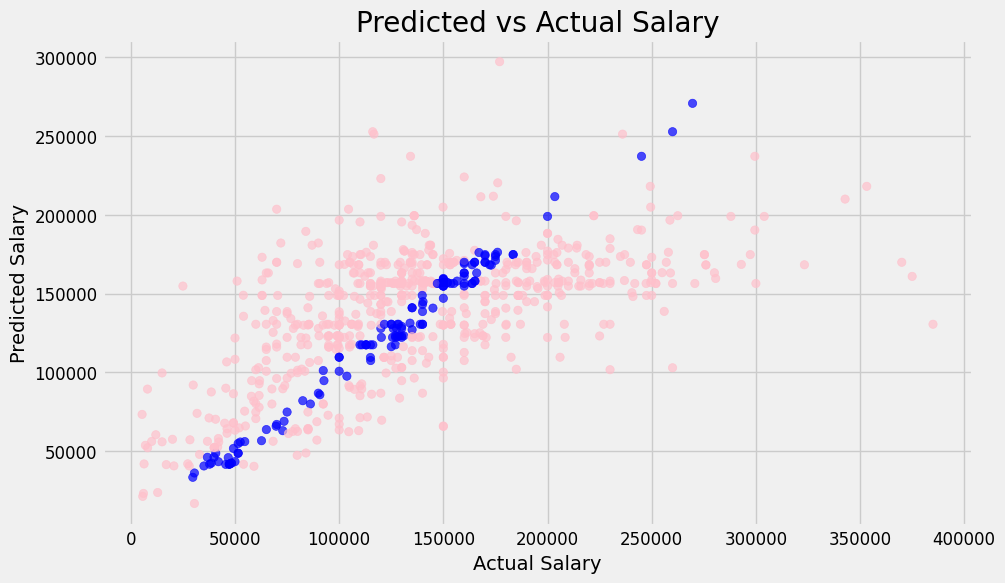

In [94]:
# Calculate absolute errors
errors = np.abs(y_test - salaries_predictions)


plt.figure(figsize=(10, 6))


plt.scatter(y_test, salaries_predictions, c=np.where(errors > 10000, 'pink', 'blue'), alpha=0.7)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Predicted vs Actual Salary')
plt.show()


# Extra material

## A full pipeline with both preparation and prediction

In [95]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(salaries, y)
full_pipeline_with_predictor.predict(some_data)


array([161039.37071641, 163819.30470604, 163819.30470604, ...,
       105907.77944942,  83389.49908102,  92173.6658304 ])

## Model persistence using joblib

In [96]:
my_model = full_pipeline_with_predictor

In [97]:
import joblib
joblib.dump(my_model, "my_model.pkl")

my_model_loaded = joblib.load("my_model.pkl")

# Causal Inference 

Questions to think about:
* If a person's title is not scientist or engineer, would their salary be lower?
* If a person's work location is not US, how would heir salary be affected?
* If a person worked at a medium or large company, would their salaey be higher?
* How does each factor play a role in determining salary level?
* Use Considtional average treatment effect (CATE), treat groups differently by state, job title, remote work ratio


In [ ]:
#added comment

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor
import warnings

from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Failed to import duecredit due to No module named 'duecredit'


In [6]:
import importlib
print(importlib.metadata.version('causalml') )

0.14.1


## Identify Target and Features

In [148]:
X = salaries.drop(columns = ["salary_in_usd"], axis=1)
y = salaries["salary_in_usd"]


In [100]:
# Dataset containes new features from custoom feature engineering
salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,residence_location_match,job_title_words,Engineer,Analyst,Scientist,Machine Learning
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,1,3,0,0,1,0
1,2023,MI,CT,ML Engineer,30000,US,100,US,S,1,2,1,0,0,0
2,2023,MI,CT,ML Engineer,25500,US,100,US,S,1,2,1,0,0,0
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M,1,2,0,0,1,0
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M,1,2,0,0,1,0


In [159]:
# turn all experience levels in upper case
salaries['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

## LRSRegressor

Average treatment effect (ATE) is calculated. All observations are given the same "medicine".

In [174]:
treatment = salaries['experience_level']
control_group = 'EX'

# Ready-to-use S-Learner using LinearRegression
learner_s = LRSRegressor(control_name='EX')
ate_s = learner_s.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

# After calling estimate_ate, add pretrain=True flag to skip training
# This flag is applicable for other meta learner
ate_s = learner_s.estimate_ate(X=X, treatment=treatment, y=y, pretrain=True)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))


TypeError: unsupported operand type(s) for -: 'str' and 'str'

## XGBTRegressor


In [156]:
treatment = salaries['experience_level']
control_group = 'EX'

learner_t = XGBTRegressor()
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the ready-to-use XGBTRegressor class')
print(ate_t)

AssertionError: Control group level 0 not found in treatment vector.

## Feature Importance

## Results Analysis